In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


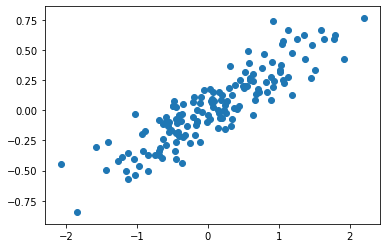

In [4]:
rang = np.random.RandomState(1)
x = np.dot(rang.rand(2,2), rang.randn(2,150)).T
plt.scatter(x[:,0], x[:,1])
plt.show()

In [5]:
#Transforming Axis
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(x)
print(pca.components_)
print(pca.explained_variance_)

[[ 0.94620462  0.32356888]
 [-0.32356888  0.94620462]]
[0.73220258 0.01762466]


Original shape: (150, 2)
Transformed Shape (150, 1)


(-2.335462554779259,
 2.4623907341218607,
 -0.9521589955586807,
 0.8722629058317848)

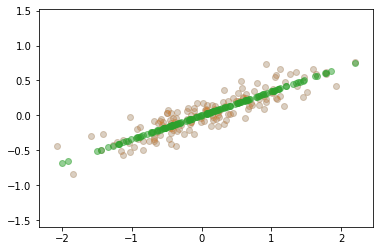

In [10]:
def draw_vec(v0,v1,ax=None):
    ax = ax or plt.gca()
    rowprops = dict(arrowstyle = '->', linewidth = 2, shrinkA = 0, shrinkB = 0)
    ax.annotate('',v1,v0,arrowprops = rowprops)
    
plt.scatter(x[:,0],x[:,1],alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector*3*np.sqrt(length)
    draw_vec(pca.mean_, pca.mean_+v)
plt.axis('equal');

pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)
print("Original shape:", x.shape)
print("Transformed Shape", x_pca.shape)

x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:,0], x[:,1], alpha=0.2)
plt.scatter(x_new[:,0],x_new[:,1],alpha = 0.5)
plt.axis('equal')

## Linear Discreminant Analysis

Accuracy : 0.9
[[13  0  0]
 [ 0  7  1]
 [ 0  2  7]]


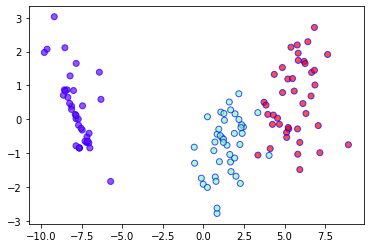

In [13]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# load the iris dataset
iris = pd.read_csv('iris.csv')

# divide the dataset into class and target variable
X = iris.iloc[:, :-1]
y = iris.iloc[:,-1]

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)
